In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('data-penyakit-tidak-menular-berdasarkan-kecamatan-magelang.csv')

dataset.head() digunakan untuk melihat 5 data teratas

In [3]:
dataset.head()

,Kecamatan,Hipertensi,Diabetes Mellitus,Rawat Inap
0,Magelang Tengah,4283,875,0
1,Magelang Selatan,7985,1369,1
2,Magelang Utara,2355,963,1
3,Tempuran,4004,1130,1
4,Salaman,2126,453,0


kita bagi ke dalam variabel x, dan variabel y.

Untuk variabel x (reguler atribut) adalah kolom ke 2, dan kolom ke 3

Untuk variabel y (label) adalah kolom terakhir (-1)

//iloc digunakan untuk mengambil baris dan kolom

In [15]:
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [18]:
print(x)

[[ 875    0]
 [1369    1]
 [ 963    1]
 [1130    1]
 [ 453    0]
 [1053    1]
 [ 242    0]
 [ 234    1]
 [ 630    0]
 [1006    1]
 [ 330    1]
 [2493    1]
 [1049    0]
 [ 909    0]
 [ 499    0]
 [ 584    1]
 [ 878    0]
 [ 429    1]
 [ 829    1]
 [1164    0]
 [ 386    0]
 [1918    0]
 [ 386    0]
 [ 102    0]]


In [17]:
print(y)

[0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0]


kita bagi data training dan data testing nya

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

setelah dibagi, jumlah x_train kurang lebih jadi 22

In [22]:
print(x_train)

[[ 909    0]
 [ 102    0]
 [ 878    0]
 [ 630    0]
 [ 242    0]
 [ 429    1]
 [ 453    0]
 [ 963    1]
 [1053    1]
 [ 829    1]
 [1006    1]
 [ 234    1]
 [1164    0]
 [1130    1]
 [ 875    0]
 [1918    0]
 [ 584    1]
 [1049    0]]


kita hitung jumlah x_train nya (untuk membuktikan)



In [21]:
len(x_train)

18

untuk jumlah data keseluruhan pada variabel x, kurang lebih ada 30

In [23]:
len(x)

24

kita hitung juga atribut x_testnya

In [24]:
len(x_test)

6

Untuk jumlah total variabel y kurang lebih juga ada 30

In [25]:
len(y)

24

kita hitung jumlah data yang ada pada atribut y_test, kurang lebih ada 8 data

In [26]:
len(y_test)

6

jumlah data pada atribut y_train setelah dibagi, total kurang lebih ada 22 data

In [27]:
len(y_train)

18

Karena jarak (skala) data yang ada pada variabel x terlalu besar(terlalu jauh), contohnya [429, ke 1], maka kita lakukan scaling menggunakan Standard Scaler

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [29]:
print(x_train)

[[ 0.25365566 -0.89442719]
 [-1.67142379 -0.89442719]
 [ 0.17970589 -0.89442719]
 [-0.41189226 -0.89442719]
 [-1.3374571  -0.89442719]
 [-0.89137301  1.11803399]
 [-0.83412158 -0.89442719]
 [ 0.38247138  1.11803399]
 [ 0.59716426  1.11803399]
 [ 0.06281755  1.11803399]
 [ 0.48504687  1.11803399]
 [-1.35654091  1.11803399]
 [ 0.86195214 -0.89442719]
 [ 0.78084594  1.11803399]
 [ 0.17254946 -0.89442719]
 [ 2.66060134 -0.89442719]
 [-0.52162417  1.11803399]
 [ 0.58762235 -0.89442719]]


In [30]:
print(x_test)

[[ 4.03225027  1.11803399]
 [-1.12753518  1.11803399]
 [-0.9939485  -0.89442719]
 [-0.72438967 -0.89442719]
 [-0.9939485  -0.89442719]
 [ 1.3509748   1.11803399]]


panggil function K-NN nya, karena kita akan mengklasifikasi

In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

kita tentukan untuk prediksinya

In [32]:
y_pred = classifier.predict(x_test)

hitung untuk evaluasi/validasinya menggunakan confusion_matrix.

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3 0]
 [0 3]]


gambarkan persebaran data trainingnya

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


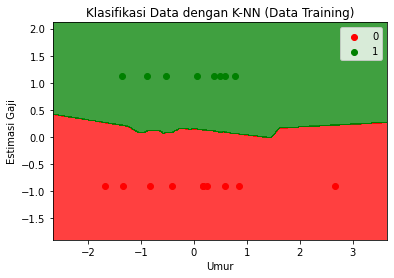

In [34]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min()-1, stop=x_set[:, 0].max()+1, step=0.01), 
                               np.arange(start=x_set[:, 1].min()-1, stop=x_set[:, 1].max()+1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], 
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Data Training)')
plt.xlabel('Umur')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()

kita lihat persebaran data testingnya

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


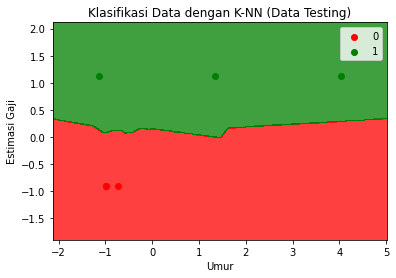

In [35]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min()-1, stop=x_set[:, 0].max()+1, step=0.01), 
                               np.arange(start=x_set[:, 1].min()-1, stop=x_set[:, 1].max()+1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], 
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Data Testing)')
plt.xlabel('Umur')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()